<a href="https://colab.research.google.com/github/PatrickRuan/3rd-ML100Days/blob/master/homework/Day086_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
x_train.shape

(50000, 3072)

In [0]:
"""Code Here
    建立你的神經網路
"""

from keras.models import Sequential, Model
from keras.layers import Dense
def build_mlp(input, output, neurons):
  model = Sequential()
  j = 0
  for n in neurons:
    print(n)
    j+=1
    if j ==1:
      model.add(Dense(units=n, input_dim= input.shape[1], activation='relu' ))
    else: 
      model.add(Dense(units=n, activation='relu' ))
  model.add(Dense(units=output, activation='softmax'))
    
  return model

In [0]:
"""Code Here
設定超參數
"""
epochs=100
batch_size=256


In [29]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True)
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(x_train,len(y_train[0]), [256,128,64])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = epochs, batch_size= batch_size, validation_data=(x_test, y_test), callbacks=[mcp])


# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

from keras.models import load_model
# Load back
cifar = load_model("./tmp.h5")
loss_loadback, acc_loadback = cifar.evaluate(x_test, y_test)



256
128
64
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.9262 - acc: 0.3056 - val_loss: 1.7877 - val_acc: 0.3613
Epoch 2/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.7417 - acc: 0.3796 - val_loss: 1.7850 - val_acc: 0.3567
Epoch 3/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.6594 - acc: 0.4072 - val_loss: 1.6010 - val_acc: 0.4321
Epoch 4/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.6013 - acc: 0.4310 - val_loss: 1.5840 - val_acc: 0.4338
Epoch 5/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.5550 - acc: 0.4453 - val_loss: 1.5358 - val_acc: 0.4511
Epoch 6/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.5075 - acc: 0.4630 - val_loss: 1.5516 - val_acc: 0.4443
Epoch 7/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.4807 - acc: 0.4705 - val_loss

In [31]:
print(loss_loadback, acc_loadback)

1.3514981325149535 0.5208


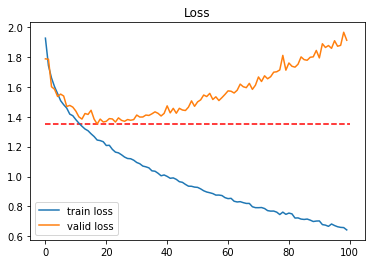

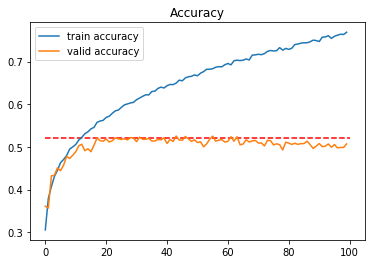

In [30]:

"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()